# EE 379K Lab 10

## Rohan Nagar and Wenyang Fu

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Problem 2

The output $y_t$ of the AR process

$$y_t = -a_1 y_{t-1} - a_2 y_{t-2} - a_3 y_{t-3} - a_4 y_{t-4} + w_t$$

is the result of passing the input $w_t$ through a linear time filter.

The $z$ transform of the filter is the transfer function between the input and the output. This is equal to

$$H(z) = \frac{1}{AR(z)} = \frac{1}{1 + a_1 z^{-1} + a_2 z^{-2} + a_3 z^{-3} + a_4 z^{-4}}$$

We can also note that in order for $H(z)$ to be a stable filter, and therefore be Wide Sense Stationary, $AR(z)$ must have all of its roots inside the unit circle.

# Problem 3

In [3]:
airline_data = pd.read_csv('data/AirPassengers.csv', parse_dates=True)
airline_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Plots

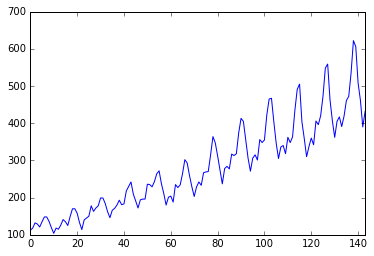

In [4]:
airline_data['#Passengers'].plot()

#### Rolling mean with window 5

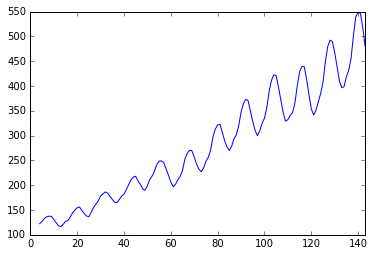

In [5]:
pd.rolling_mean(airline_data['#Passengers'], window=5).plot()

#### Rolling standard deviation with window 5

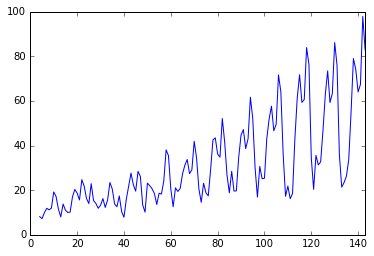

In [6]:
pd.rolling_std(airline_data['#Passengers'], window=5).plot()

## Transforms

Log Transform

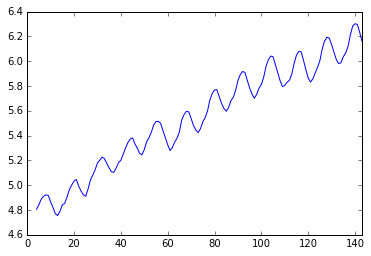

In [7]:
airline_data['#Passengers.log'] = np.log(airline_data['#Passengers'])
pd.rolling_mean(airline_data['#Passengers.log'], window=5).plot()

Sqrt transform

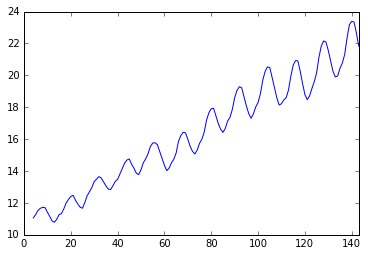

In [8]:
airline_data['#Passengers.sqrt'] = np.sqrt(airline_data['#Passengers'])
pd.rolling_mean(airline_data['#Passengers.sqrt'], window=5).plot()

### Question
Which of these is better?

### Answer
TODO

## Dickey-Fuller Test

In [9]:
from statsmodels.tsa.stattools import adfuller

adfuller(airline_data['#Passengers'])

(0.81536887920605083,
 0.99188024343764103,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 996.69293083901891)

## Remove Mean with Transform of Differences

In [10]:
def difference_transform(series):
    new_series = []
    for i in range(len(series)):
        if i == 0:
            new_series.append(series[i])
        else:
            new_series.append(series[i] - series[i-1])
            
    return new_series

(-3.1551124072891468,
 0.022734464303624552,
 12,
 131,
 {'1%': -3.481281802271349,
  '10%': -2.5786771965503177,
  '5%': -2.8838678916645279},
 995.40139015094792)

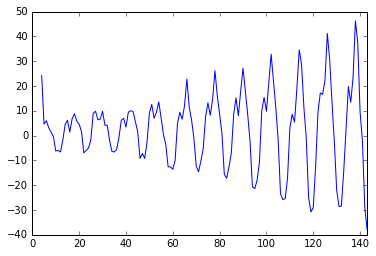

In [11]:
airline_data['#Passengers.diff'] = difference_transform(airline_data['#Passengers'])
pd.rolling_mean(airline_data['#Passengers.diff'], window=5).plot()

adfuller(airline_data['#Passengers.diff'])

## Regress Against Linear Function

In [21]:
from sklearn.linear_model import LinearRegression

# need to do linear regression with time steps (0, 1, 2, ..) as the X and the airline_data['#Passengers'] as the y.
regr = LinearRegression()

# Problem 4

### Quebec Data

In [3]:
quebec_data = pd.read_csv('data/QuebecCarsales.csv')
quebec_data.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


### Dow Jones Data

In [4]:
dow_data = pd.read_csv('data/DowJones.csv')
dow_data.head()

,Week,"Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974"
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43
